In [1]:
using Revise
using QuantumCollocation
using NamedTrajectories
using LinearAlgebra
using SparseArrays
using HDF5

Precompiling QuantumCollocation
  ✓ MPItrampoline_jll
  ✓ Compat
  ✓ IntervalSets
  ✓ MicrosoftMPI_jll
  ✓ SymbolicIndexingInterface
  ✓ MPICH_jll
  ✓ TupleTools
  ✓ AbstractTrees
  ✓ LogExpFunctions
  ✓ libpng_jll
  ✓ Compat → CompatLinearAlgebraExt
  ✓ ArrayInterface
  ✓ libsixel_jll
  ✓ Einsum
  ✓ ConstructionBase → ConstructionBaseIntervalSetsExt
  ✓ IntervalSets → IntervalSetsRecipesBaseExt
  ✓ ArrayInterface → ArrayInterfaceGPUArraysCoreExt
  ✓ Cairo_jll
  ✓ HDF5_jll
  ✓ IntervalSets → IntervalSetsRandomExt
  ✓ ArrayInterface → ArrayInterfaceStaticArraysCoreExt
  ✓ ChainRulesCore
  ✓ FilePathsBase
  ✓ IntervalSets → IntervalSetsStatisticsExt
  ✓ ChainRulesCore → ChainRulesCoreSparseArraysExt
  ✓ AbstractFFTs → AbstractFFTsChainRulesCoreExt
  ✓ HarfBuzz_jll
  ✓ StaticArrays → StaticArraysChainRulesCoreExt
  ✓ DataStructures
  ✓ FilePaths
  ✓ FiniteDiff
  ✓ AxisArrays
  ✓ StableHashTraits
  ✓ LogExpFunctions → LogExpFunctionsChainRulesCoreExt
  ✓ SortingAlgorithms
  ✓ SimplePartiti

In [2]:
ω = [4.1405, 3.4637, 4.8001, 4.4153]

δ = [225.78, 100.33, 189.32, 172.15] * 1e-3

g = Symmetric([
    0.0 54.38   6.26  2.73;
    0.0   0.0  52.60 41.12;
    0.0   0.0    0.0  6.01;
    0.0   0.0    0.0   0.0
]) * 1e-3

4×4 Symmetric{Float64, Matrix{Float64}}:
 0.0      0.05438  0.00626  0.00273
 0.05438  0.0      0.0526   0.04112
 0.00626  0.0526   0.0      0.00601
 0.00273  0.04112  0.00601  0.0

In [3]:
csys = MultiTransmonSystem(ω, δ, g; subsystems=[1,2]) 

CompositeQuantumSystem(sparse([2, 4, 3, 5, 2, 3, 5, 7, 6, 8, 5, 7, 6, 8, 9], [2, 2, 3, 3, 4, 5, 5, 5, 6, 6, 7, 7, 8, 8, 9], ComplexF64[-4.252459815899147 + 0.0im, 0.34167961700442595 + 0.0im, -9.135311613667623 + 0.0im, 0.48320794835410397 + 0.0im, 0.34167961700442595 + 0.0im, 0.48320794835410397 + 0.0im, -4.252459815899147 + 0.0im, 0.48320794835410397 + 0.0im, -9.135311613667623 + 0.0im, 0.683359234008852 + 0.0im, 0.48320794835410397 + 0.0im, -1.4186175786550073 + 0.0im, 0.683359234008852 + 0.0im, -5.671077394554155 + 0.0im, -10.55392919232263 + 0.0im], 9, 9), SparseMatrixCSC{ComplexF64, Int64}[sparse([4, 5, 6, 1, 7, 2, 8, 3, 9, 4, 5, 6], [1, 2, 3, 4, 4, 5, 5, 6, 6, 7, 8, 9], ComplexF64[6.283185307179586 + 0.0im, 6.283185307179586 + 0.0im, 6.283185307179586 + 0.0im, 6.283185307179586 + 0.0im, 8.885765876316732 + 0.0im, 6.283185307179586 + 0.0im, 8.885765876316732 + 0.0im, 6.283185307179586 + 0.0im, 8.885765876316732 + 0.0im, 8.885765876316732 + 0.0im, 8.885765876316732 + 0.0im, 8.8857

In [4]:
op = EmbeddedOperator([:H, :H], csys, 1:2)

EmbeddedOperator(ComplexF64[0.4999999999999999 + 0.0im 0.4999999999999999 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.4999999999999999 + 0.0im -0.4999999999999999 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im], [1, 2, 4, 5], [3, 3])

In [5]:
T = 100
Δt = 0.5
a_guess = h5open("plus_plus_pulse_a_bound_0.03_updated.h5", "r")["a"][:,:]
Δt = h5open("plus_plus_pulse_a_bound_0.03_updated.h5", "r")["times"][2]
prob = UnitarySmoothPulseProblem(
    csys, 
    op, 
    T, 
    Δt; 
    # prob.trajectory.Δt[end];
    # a_guess=prob.trajectory.a,
    a_guess=a_guess,
    a_bound=0.05,
    dda_bound=1.0,
    Δt_min=0.05,
    Δt_max=0.6,
)
solve!(prob; max_iter=50)

applying constraint: initial value of Ũ⃗
applying constraint: initial value of a
applying constraint: final value of a
applying constraint: bounds on a


applying constraint: bounds on dda
applying constraint: bounds on Δt
applying constraint: time step all equal constraint



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:   572248
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:   177185

Total number of variables............................:    17330
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      892
                     variables with only upper bounds:        0
Total number of equality constraints.................:    16929
Total number of inequality c

   1  1.0180950e+00 2.15e-02 1.35e+01  -1.0 3.25e-01    -  6.29e-01 1.00e+00f  1


   2  1.4796363e-01 5.93e-03 2.29e+01  -1.0 7.08e-01    -  7.92e-01 1.00e+00f  1


   3  3.6663382e+00 5.60e-03 3.63e+01  -1.0 6.97e-01    -  1.00e+00 1.00e+00f  1


   4  4.1692136e+00 9.30e-05 4.08e+01  -1.0 3.98e-02   2.0 1.00e+00 1.00e+00h  1


   5  3.9982170e+00 4.05e-06 2.91e+00  -1.0 6.46e-03   1.5 1.00e+00 1.00e+00h  1


   6  5.3934207e-01 2.57e-03 2.19e+01  -1.0 4.76e-01    -  1.00e+00 1.00e+00f  1


   7  6.8360875e-01 1.98e-03 6.53e+00  -1.0 6.38e-01    -  1.00e+00 2.50e-01f  3


   8  1.5634544e+00 5.85e-05 1.95e+00  -1.0 4.09e-02   1.0 1.00e+00 1.00e+00h  1


   9  1.4303437e+00 5.42e-05 2.16e+00  -1.0 7.55e-02    -  1.00e+00 1.00e+00h  1


iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.4237142e+00 8.72e-05 5.65e-02  -1.0 4.01e-02    -  1.00e+00 1.00e+00h  1


  11  1.1049581e-01 4.37e-04 3.37e-01  -2.5 1.03e-01    -  9.47e-01 1.00e+00f  1


  12  1.3716588e-02 9.90e-04 1.99e+01  -2.5 3.31e-01    -  8.38e-01 5.00e-01h  2


  13  4.9090548e-02 9.55e-04 7.30e-01  -2.5 9.41e-01    -  4.06e-01 3.93e-02h  5


  14  7.1721984e-01 1.39e-05 7.16e-02  -2.5 1.08e-02   0.6 1.00e+00 1.00e+00h  1


  15  5.2923722e-01 5.37e-04 2.27e-01  -2.5 4.11e-01    -  1.00e+00 5.00e-01f  2


  16  4.1044054e-01 4.68e-04 2.54e-01  -2.5 1.64e-01    -  1.00e+00 1.00e+00H  1


  17  2.8551011e-01 6.32e-04 5.48e-02  -2.5 1.15e-01    -  1.00e+00 1.00e+00h  1


  18  3.9427535e-01 1.44e-05 1.96e-03  -2.5 3.15e-02    -  1.00e+00 1.00e+00h  1


  19  2.1725604e-01 1.15e-03 1.13e-01  -3.8 2.52e-01    -  8.27e-01 1.00e+00f  1


iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  2.6796667e-01 5.56e-06 2.24e-02  -3.8 6.25e-03   0.1 1.00e+00 1.00e+00h  1


  21  2.5296878e-01 1.49e-05 1.00e-02  -3.8 1.29e-02  -0.4 1.00e+00 1.00e+00h  1


  22  2.2936609e-01 4.87e-05 1.52e-02  -3.8 2.58e-02  -0.9 1.00e+00 8.82e-01h  1


  23  2.0390123e-01 1.03e-04 5.81e-03  -3.8 5.34e-02  -1.3 1.00e+00 1.00e+00f  1


  24  1.9065062e-01 2.25e-04 8.64e-03  -3.8 8.95e-02  -1.8 1.00e+00 1.00e+00h  1


  25  1.6992574e-01 2.73e-04 6.39e-03  -3.8 1.92e-01  -2.3 1.00e+00 1.00e+00h  1


  26  1.8285284e-01 1.53e-05 1.05e-03  -3.8 5.78e-02  -1.9 1.00e+00 1.00e+00h  1


  27  1.6232446e-01 1.23e-04 3.58e-03  -4.0 1.49e-01  -2.3 1.00e+00 1.00e+00h  1


  28  1.6920814e-01 9.11e-06 1.01e-03  -4.0 4.51e-02  -1.9 1.00e+00 1.00e+00h  1


  29  1.6476900e-01 6.03e-05 2.73e-03  -4.0 1.07e-01  -2.4 1.00e+00 1.00e+00h  1


iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30  1.6365804e-01 8.58e-06 9.09e-04  -4.0 3.77e-02  -2.0 1.00e+00 1.00e+00h  1


  31  7.5711493e-02 3.31e-04 8.10e-03  -4.0 1.28e-01  -2.4 1.00e+00 1.00e+00H  1


  32  1.5213344e-01 6.11e-05 4.82e-03  -4.0 4.09e-02  -2.0 1.00e+00 1.00e+00h  1


  33  5.4408713e-02 8.49e-04 2.39e-02  -4.0 2.02e-01  -2.5 3.33e-01 3.21e-01H  1


  34  1.2519608e-01 7.56e-05 9.96e-03  -4.0 9.41e-02  -2.1 1.00e+00 1.00e+00h  1


  35  6.4949129e-02 1.02e-03 2.51e-02  -4.0 2.29e-01  -2.5 9.93e-01 1.00e+00h  1


  36  6.7785908e-02 9.93e-04 5.69e-02  -4.0 1.22e+00  -3.0 2.46e-01 3.66e-02h  3


  37  7.0134432e-02 9.62e-04 7.69e-02  -4.0 2.46e-01  -2.6 1.00e+00 3.12e-02h  6


  38  2.9768941e-02 1.63e-03 5.68e-02  -4.0 7.33e-01  -3.1 4.30e-02 2.87e-02H  1


  39  4.3878222e-02 1.44e-03 6.04e-02  -4.0 3.05e-01  -2.7 4.97e-01 1.25e-01h  4


iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40  1.2000159e-02 2.62e-03 7.69e-02  -4.0 1.92e+00  -3.1 3.24e-02 1.25e-01H  1


  41  2.6104986e-02 1.31e-03 3.87e-02  -4.0 2.51e-01  -2.7 3.31e-01 5.07e-01h  1


  42  1.8140247e-02 1.26e-03 1.81e+01  -4.0 8.20e-01  -3.2 5.05e-01 5.63e-01h  1


  43  7.4333436e-03 1.28e-03 3.95e-01  -4.0 1.06e+01  -3.7 4.08e-02 2.23e-02h  1


  44  1.3012485e-01 3.19e-05 1.02e-01  -4.0 1.11e-01  -1.4 1.00e+00 1.00e+00h  1


  45  9.4628971e-03 9.19e-04 1.83e+01  -4.0 2.96e+00    -  2.39e-01 2.38e-01h  1


  46  7.1978023e-03 9.63e-04 1.99e-01  -4.0 1.58e+01    -  3.57e-02 1.15e-02h  3


  47  1.2528975e-01 2.36e-05 7.74e-02  -4.0 1.43e-01  -1.9 1.00e+00 1.00e+00h  1


  48  9.3204572e-03 1.65e-03 1.93e+01  -4.0 4.03e+00    -  8.26e-02 1.45e-01h  1


  49  2.5612009e-02 1.53e-03 1.70e+00  -4.0 7.57e-01  -2.4 1.46e-01 8.87e-02h  1


iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50  9.1063718e-02 5.92e-04 6.59e-01  -4.0 1.59e-02  -0.1 1.00e+00 6.12e-01h  1



Number of Iterations....: 50

                                   (scaled)                 (unscaled)
Objective...............:   9.1063717732203578e-02    9.1063717732203578e-02
Dual infeasibility......:   6.5924264658956311e-01    6.5924264658956311e-01
Constraint violation....:   5.9206528958100080e-04    5.9206528958100080e-04
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   1.9803028677454139e-03    1.9803028677454139e-03
Overall NLP error.......:   6.5924264658956311e-01    6.5924264658956311e-01


Number of objective function evaluations             = 84
Number of objective gradient evaluations             = 51
Number of equality constraint evaluations            = 84
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 51
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 50
Total seconds in IPOPT        

In [6]:
unitary_fidelity(prob; subspace=op.subspace_indices)

0.998610020542635

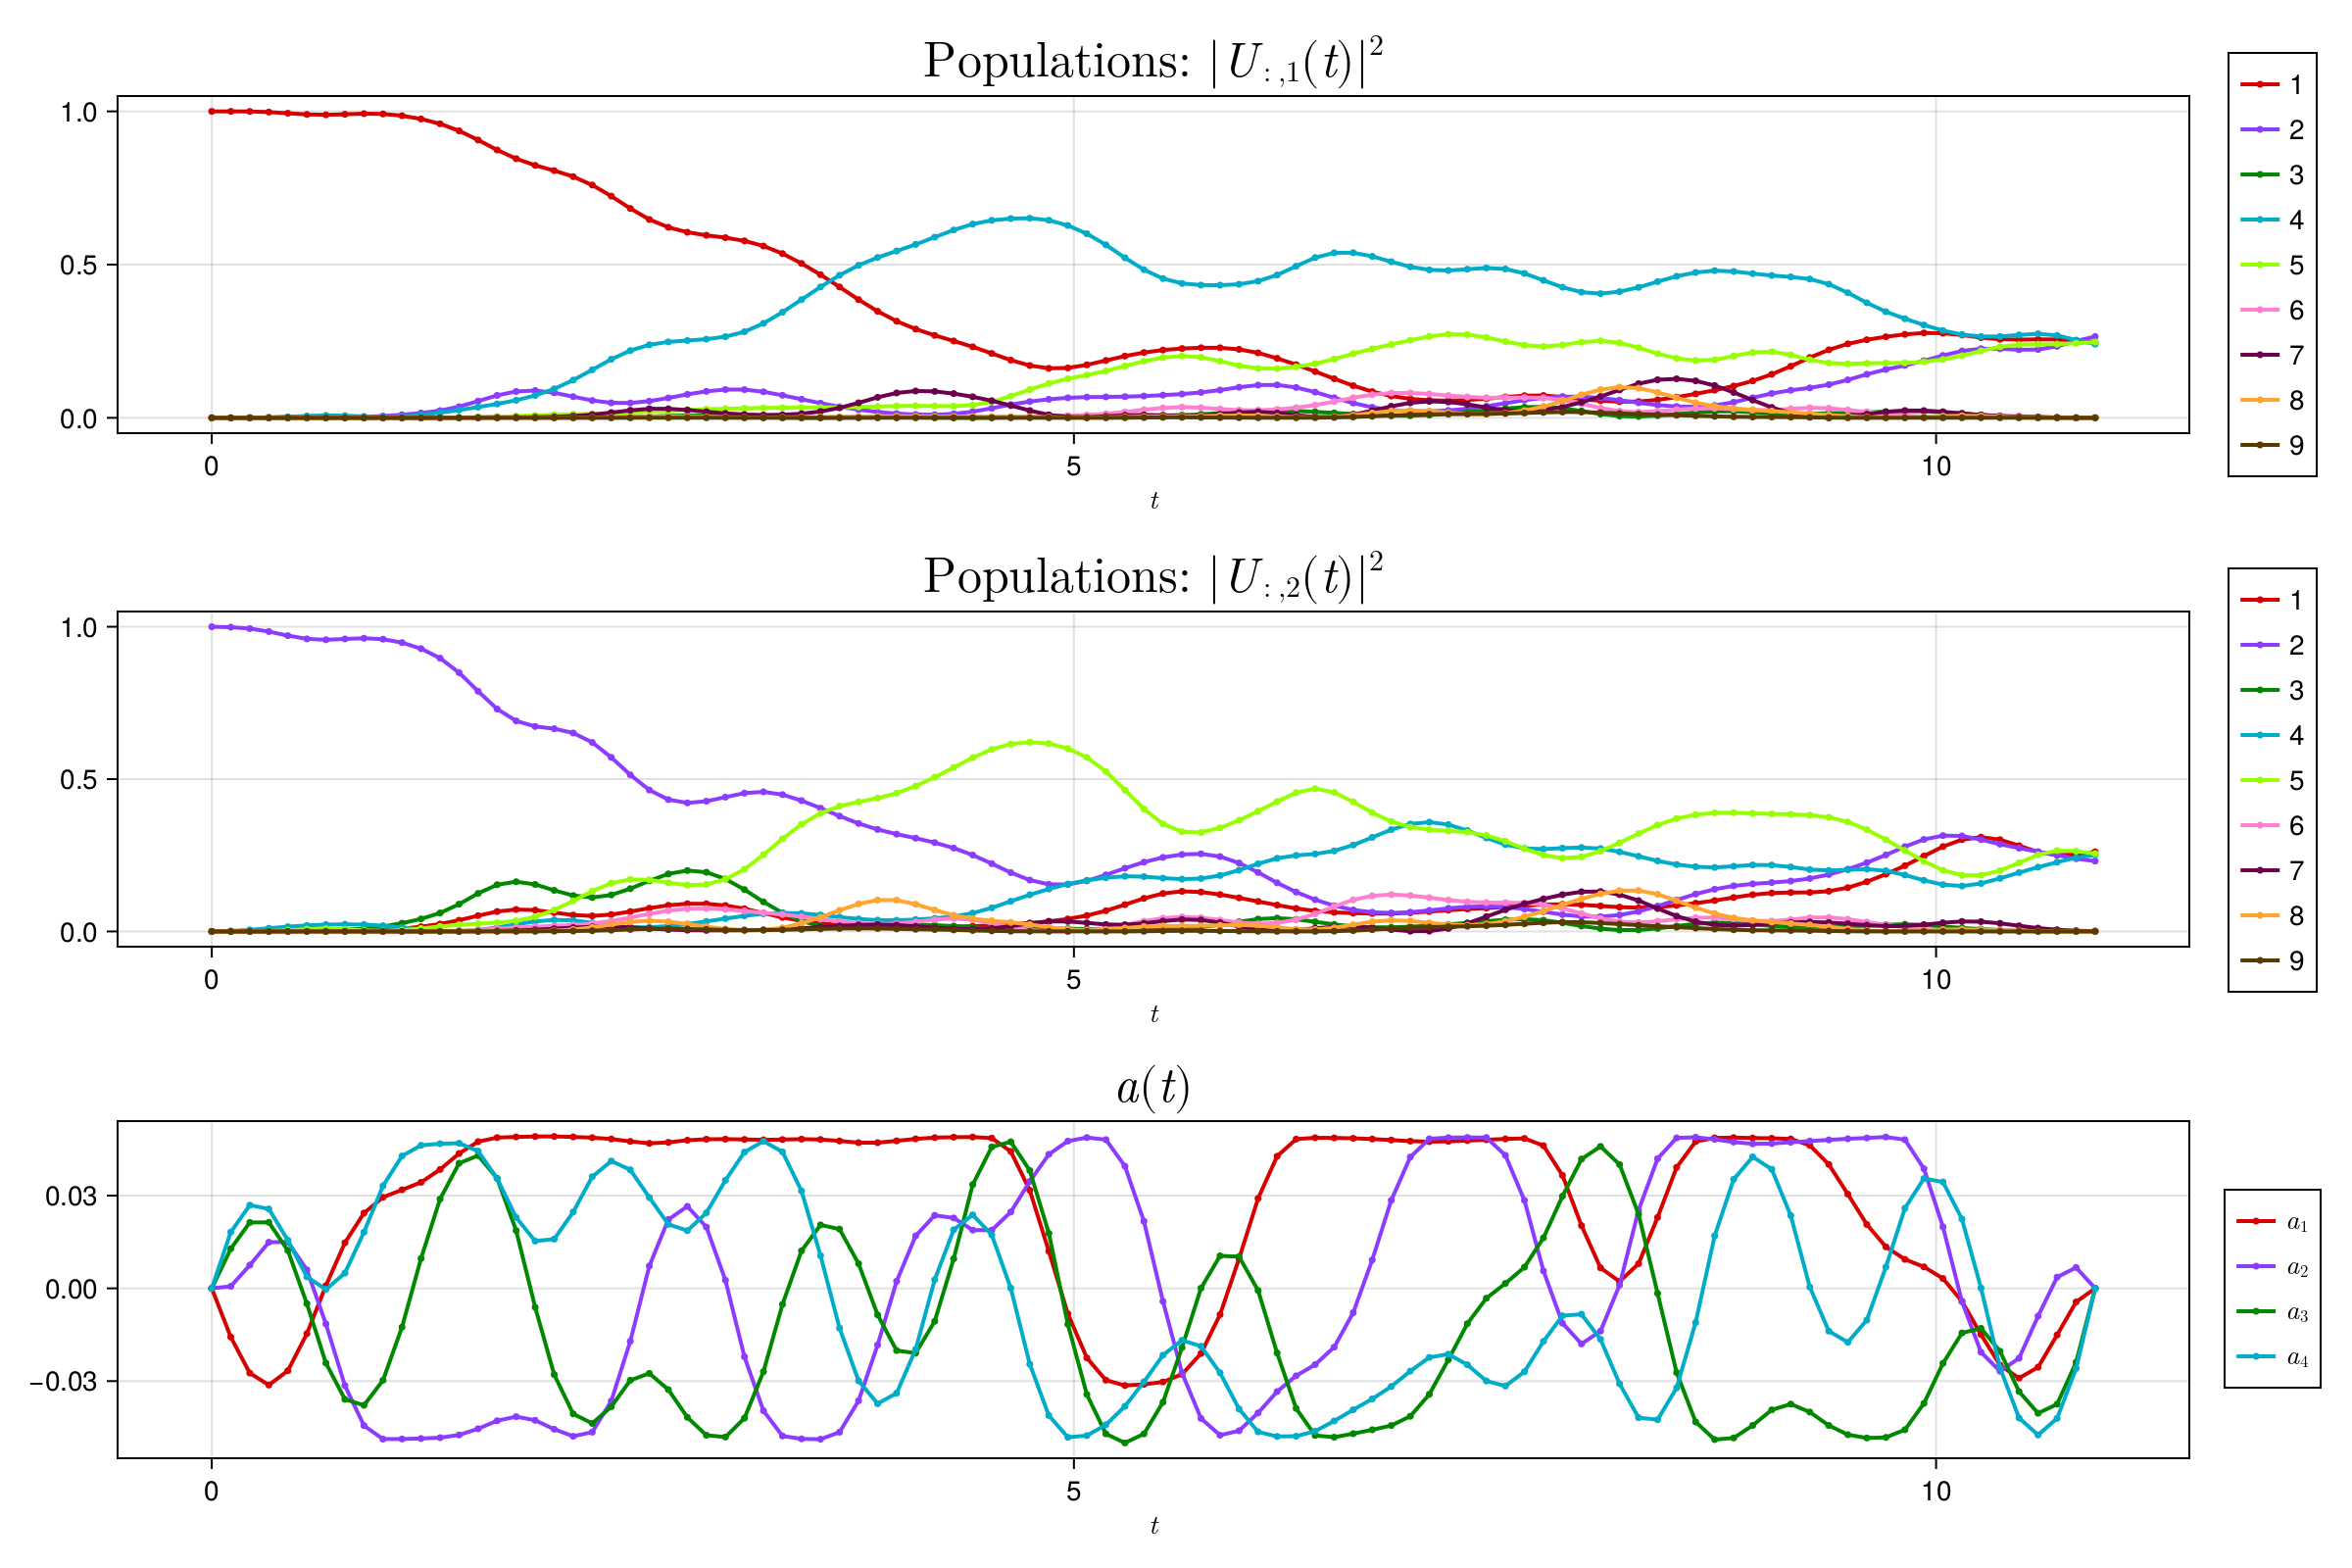

In [7]:
fig = plot_unitary_populations(prob)
save("unitary_populations.png", fig)
fig


In [8]:
csys_full = MultiTransmonSystem(ω, δ, g; levels=4, subsystem_drive_indices=1:2)

CompositeQuantumSystem(sparse([2, 4, 10, 28, 3, 5, 11, 29, 2, 4  …  80, 53, 71, 77, 79, 54, 72, 78, 80, 81], [2, 2, 2, 2, 3, 3, 3, 3, 4, 4  …  78, 79, 79, 79, 79, 80, 80, 80, 80, 81], ComplexF64[1.7266193224129498 + 0.0im, 0.03776194369614931 + 0.0im, 0.2583645798312246 + 0.0im, 0.017153095888600273 + 0.0im, 2.3715882941949347 + 0.0im, 0.053403452916663555 + 0.0im, 0.365382692834144 + 0.0im, 0.02425814084234468 + 0.0im, 0.03776194369614931 + 0.0im, 4.144389028615651 + 0.0im  …  0.07552388739229865 + 0.0im, 0.02425814084234468 + 0.0im, 0.365382692834144 + 0.0im, 0.053403452916663555 + 0.0im, -3.454683777446567 + 0.0im, 0.03430619177720055 + 0.0im, 0.5167291596624493 + 0.0im, 0.07552388739229865 + 0.0im, -1.728064455033617 + 0.0im, -1.0830954832516322 + 0.0im], 81, 81), SparseMatrixCSC{ComplexF64, Int64}[sparse([28, 29, 30, 31, 32, 33, 34, 35, 36, 37  …  45, 46, 47, 48, 49, 50, 51, 52, 53, 54], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  72, 73, 74, 75, 76, 77, 78, 79, 80, 81], ComplexF64[6.28318

In [9]:
op_full = EmbeddedOperator([:H, :H], csys_full, 1:2)

EmbeddedOperator(ComplexF64[0.4999999999999999 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.4999999999999999 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im], [1, 2, 4, 5, 10, 11, 13, 14, 28, 29, 31, 32, 37, 38, 40, 41], [3, 3, 3, 3])

In [10]:
unitary_fidelity(
    op_full.operator, 
    prob.trajectory.a, 
    prob.trajectory.Δt, 
    csys_full; 
    subspace=op_full.subspace_indices
)

0.7514754373190402

In [11]:
ψ = quantum_state("gggg", csys_full)
ψ_goal = op_full.operator * ψ

ψ̃_T = rollout(ψ, prob.trajectory.a, prob.trajectory.Δt, csys_full)[:, end]
ψ_T = iso_to_ket(ψ̃_T)
fidelity(ψ_T, ψ_goal)

0.9855363587318615

In [46]:
pulse_save_path = joinpath(@__DIR__, "plus_plus_pulse_a_bound_0.03_updated.h5")

h5open(pulse_save_path, "w") do file
    write(file, "a", prob.trajectory.a)
    write(file, "times", get_times(prob.trajectory))
end

In [22]:
# test loading the pulse
pulse = h5open(pulse_save_path, "r")
pulse["a"][:,:]
pulse["times"][:]

UndefVarError: UndefVarError: `h5open` not defined

In [20]:
prob_min_time = UnitaryMinimumTimeProblem(
    prob;
    final_fidelity=0.99,
    D=0.001,
    subspace=op.subspace_indices
)

solve!(prob_min_time; max_iter=50)

applying constraint: initial value of Ũ⃗
applying constraint: initial value of a
applying constraint: final value of a
applying constraint: bounds on a
applying constraint: bounds on dda
applying constraint: bounds on Δt
applying constraint: time step all equal constraint


This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:   572248
Number of nonzeros in inequality constraint Jacobian.:       32
Number of nonzeros in Lagrangian Hessian.............:   177713

Total number of variables............................:    17330
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      892
                     variables with only upper bounds:        0
Total number of equality constraints.................:    16929
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0209646e-01 5.46e-01 3.73e-03  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

   1  6.6981782e-02 5.46e-01 1.37e+01  -1.0 1.23e+00    -  2.16e-01 1.77e-02f  1


   2  6.7015094e-02 5.46e-01 1.14e+04  -1.0 1.15e+00    -  1.37e-01 4.51e-05h  3


   3  6.1380476e-02 5.46e-01 2.32e+04  -1.0 5.94e+01    -  3.43e-03 4.97e-05h  7


   4r 6.1380476e-02 5.46e-01 1.00e+03  -0.3 0.00e+00  -4.0 0.00e+00 4.31e-07R 13
   5r 4.7925499e-01 5.43e-01 7.97e+02  -0.3 2.05e+00    -  7.31e-02 2.03e-01f  1
   6r 2.9439280e+00 5.33e-01 5.12e+02  -0.3 7.00e-01    -  4.39e-01 3.58e-01f  1
   7r 2.3663222e-01 5.45e-01 1.98e+02  -0.3 4.59e-01    -  3.60e-01 1.00e+00f  1
   8r 3.0217052e-01 5.44e-01 4.67e+01  -0.3 3.02e-01    -  7.63e-01 1.00e+00f  1
   9r 1.6154868e-02 5.46e-01 3.25e-01  -0.3 9.42e-02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10r 4.1825138e-01 5.47e-01 3.78e+00  -2.5 2.22e-01    -  8.15e-01 9.83e-01f  1
  11r 4.6992284e-01 5.48e-01 2.29e+00  -2.5 8.74e-02    -  8.54e-01 1.00e+00f  1
  12r 2.2223009e-01 5.46e-01 5.43e-01  -2.5 1.69e-01    -  9.32e-01 1.00e+00f  1
  13r 1.4452984e-01 5.46e-01 3.49e-01  -2.5 1.38e-01    -  1.00e+00 1.00e+00h  1
  14r 1.8445656e-01 5.46e-01 2.83e-02  -2.5 4.11e-02    -  1.00e+00 1.00e+00h  1
  15r 1.0814184e-01 5.46e-01

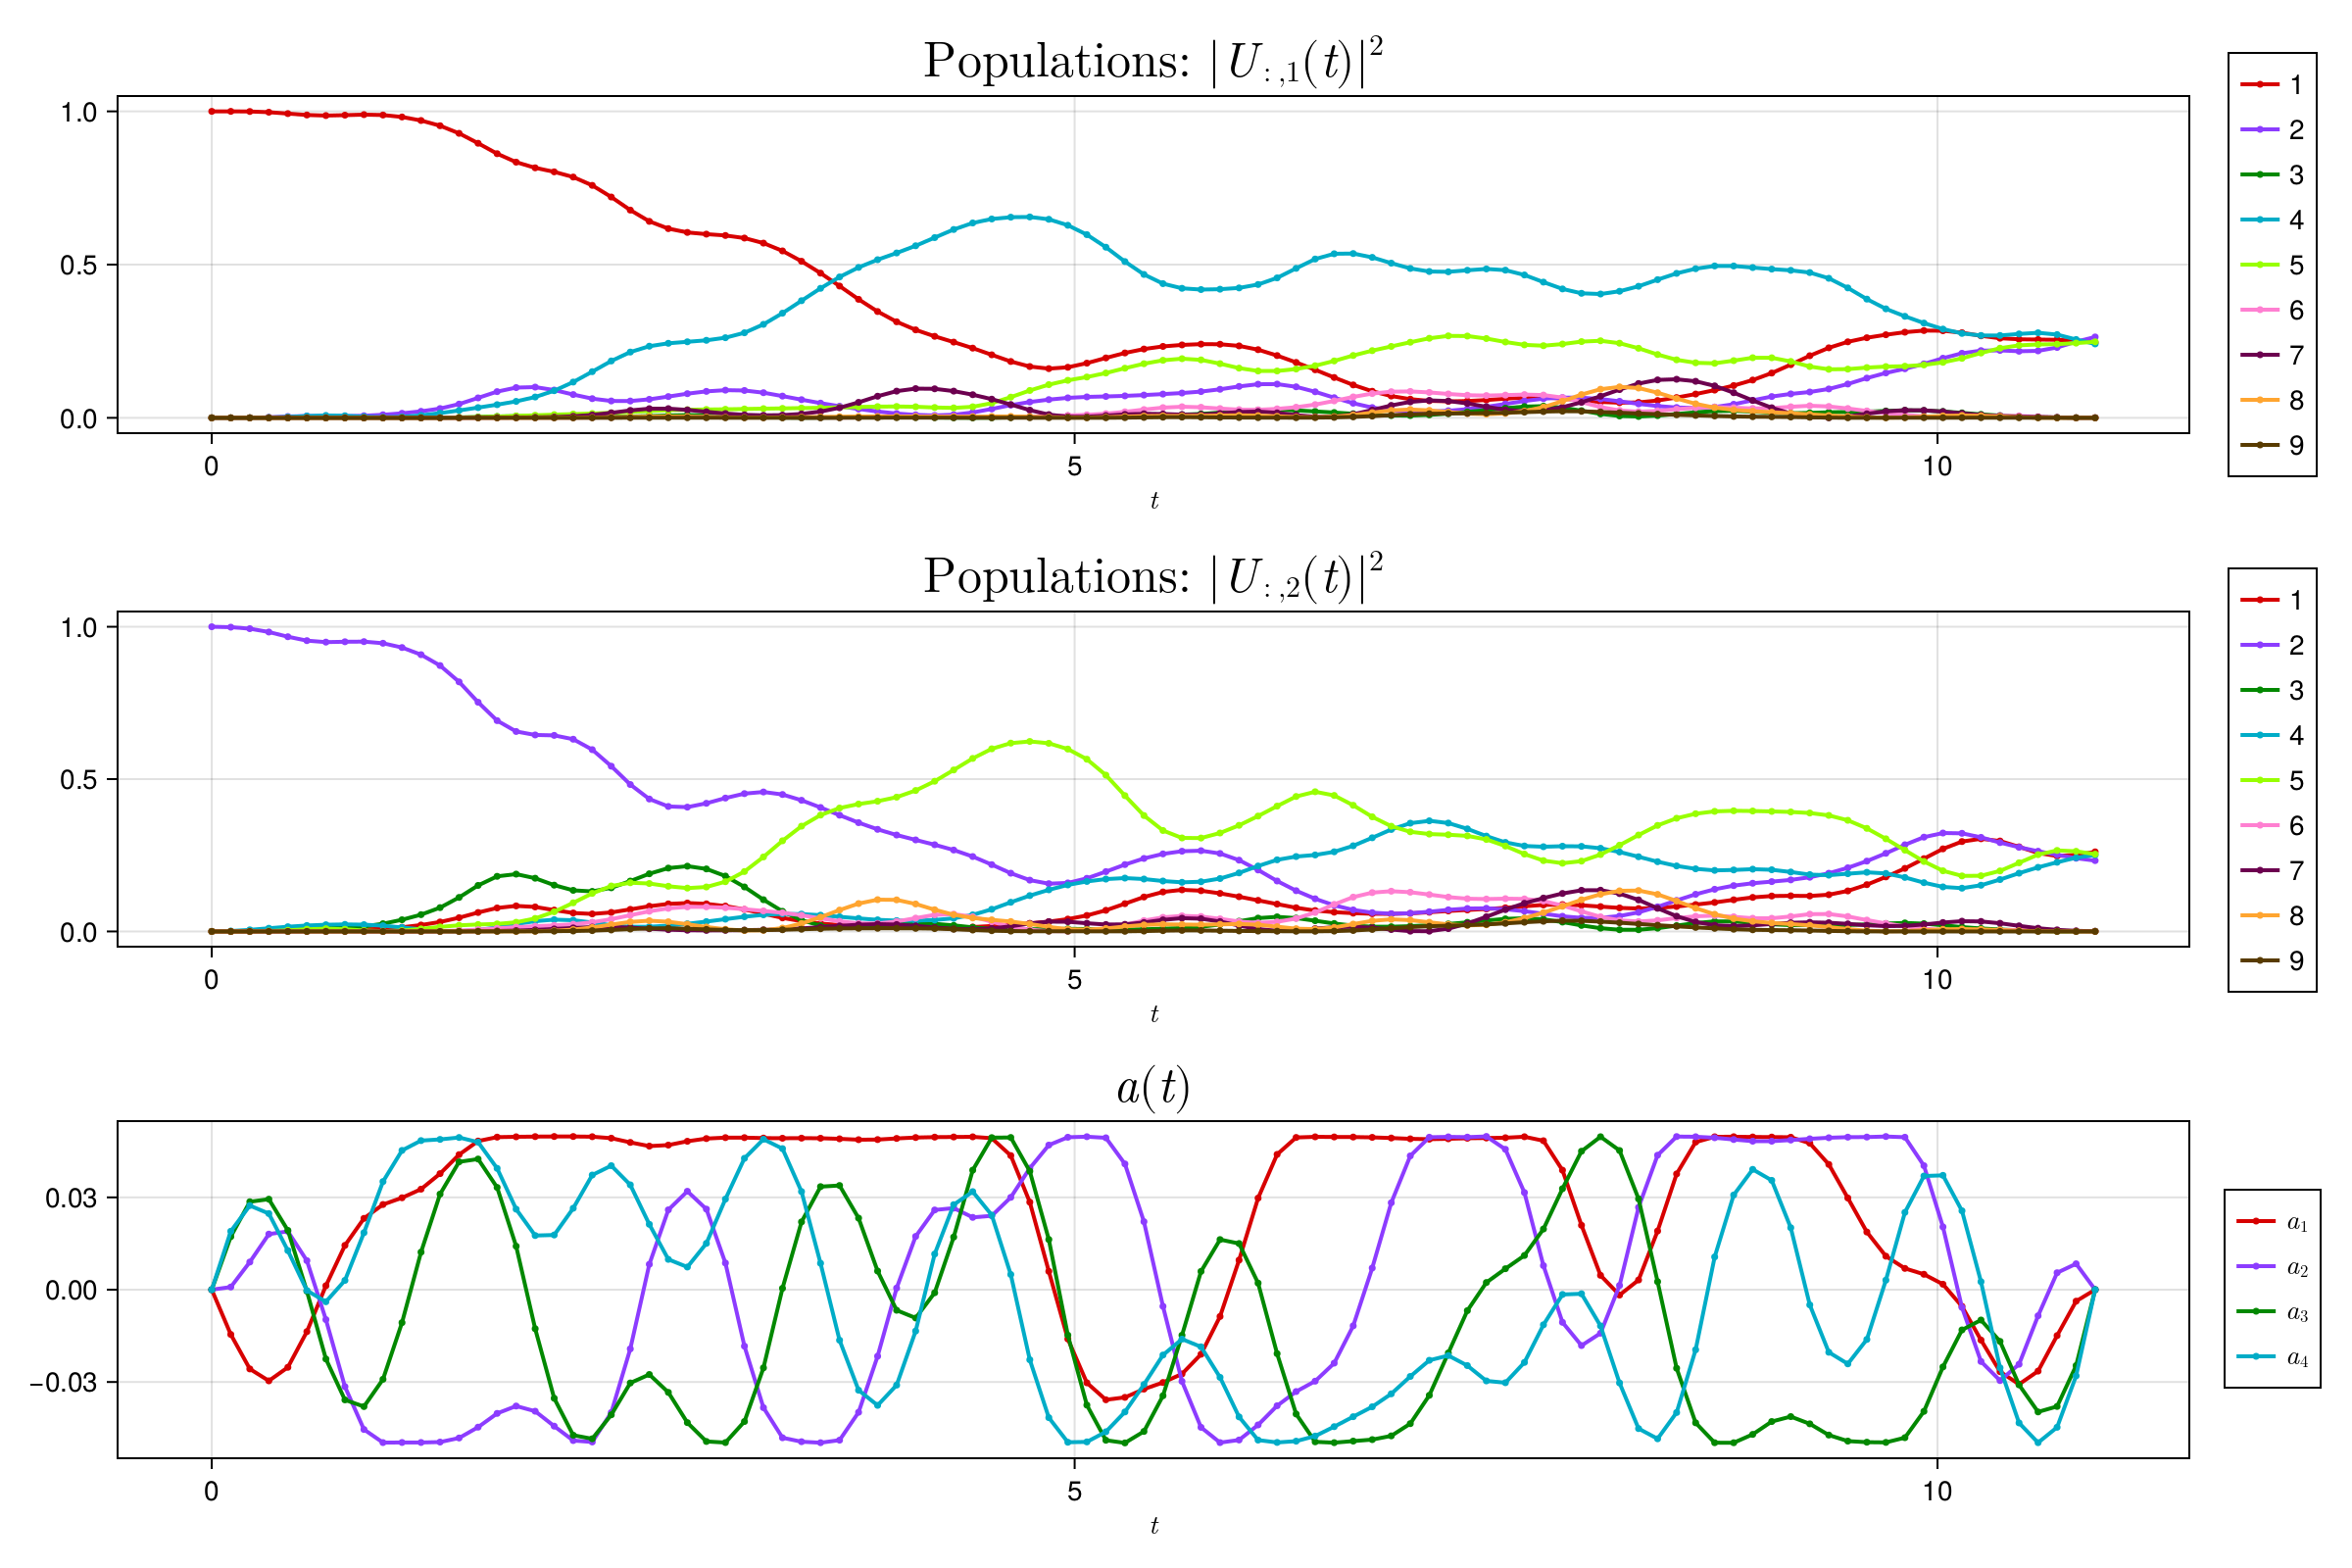

In [21]:
plot_unitary_populations(prob_min_time)